# Practice Session 01+02: Data preparation

Author: <font color="blue">Aniol Petit</font>

E-mail: <font color="blue">aniol.petit01@estudiant.upf.edu</font>

Date: <font color="blue">01/10/2024</font>

<font size="+2" color="blue">Additional results: model purchased device</font>

# 1. Exploratory data analysis 

In [1]:
import pandas as pd
import seaborn as sns
import datetime

import numpy as np
from numpy import array
from numpy import argmax

import matplotlib.pyplot as plt
from matplotlib import pyplot

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# LEAVE AS-IS

input_dataset = pd.read_csv("device_db.csv", sep=",")

## 1.1. Data types and simple statistics

<font size="+1" color="red">Replace this cell with your code to print the dataset header (column names) and the first five rows of data.</font>

In [3]:
print(input_dataset.columns)
display(input_dataset.head())

Index(['PURCHASED_DEVICE', 'DEVICE_VALUE', 'LAST_DEVICE_CHANGE',
       'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
       'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
       'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2',
       'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4',
       'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6', 'BILLING_MONTH_1',
       'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4',
       'BILLING_MONTH_5', 'BILLING_MONTH_6', 'DEVICE_COST_MONTH_1',
       'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4',
       'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6', 'LINE_ACTIVATION_DATE',
       'MONTHS_LAST_DEVICE', 'DURATION_LINE', 'PREVIOUS_DEVICE_MODEL',
       'PREVIOUS_DEVICE_MANUF', 'PREVIOUS_DEVICE_BRAND'],
      dtype='object')


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


<font size="+1" color="red">Replace this cell with your code to create and display a dataframe containing one row per column, and with the following fields: name of the column, type, number of distinct elements, and size. The size of all columns should be equal.</font>

In [4]:
column_info = []

for column in input_dataset.columns:
    column_name = column
    column_type = input_dataset[column].dtype
    distinct_elements = input_dataset[column].nunique()
    column_size = input_dataset[column].size
    
    column_info.append({
        "Column Name": column_name,
        "Column Type": column_type,
        "Number of Distinct Elements": distinct_elements,
        "Column Size": column_size
    })


column_type_df = pd.DataFrame(column_info)

display(column_type_df)

,Column Name,Column Type,Number of Distinct Elements,Column Size
0,PURCHASED_DEVICE,object,101,10000
1,DEVICE_VALUE,float64,368,10000
2,LAST_DEVICE_CHANGE,float64,76,10000
3,DATA_TRAFFIC_MONTH_1,float64,7215,10000
4,DATA_TRAFFIC_MONTH_2,float64,7182,10000
5,DATA_TRAFFIC_MONTH_3,float64,7176,10000
6,DATA_TRAFFIC_MONTH_4,float64,7124,10000
7,DATA_TRAFFIC_MONTH_5,float64,7173,10000
8,DATA_TRAFFIC_MONTH_6,float64,7074,10000
9,VOICE_TRAFFIC_MONTH_1,float64,3550,10000


<font size="+1" color="red">Replace this cell with code to create and display a dataframe containing one row per each column of type ``float64`` in the input data, and with the following fields: name of the column, mean, median, min, max -- all computed ignoring NaN values.</font>

In [5]:
pd.options.display.float_format = '{:.2f}'.format
float_columns_info = []

for column in input_dataset.columns:
    if input_dataset[column].dtype == 'float64':
        column_mean = input_dataset[column].mean(skipna=True)
        column_median = input_dataset[column].median(skipna=True)
        column_min = input_dataset[column].min(skipna=True)
        column_max = input_dataset[column].max(skipna=True)
        
        float_columns_info.append({
            "Column Name": column,
            "Mean": column_mean,
            "Median": column_median,
            "Min": column_min,
            "Max": column_max
        })

float_columns_df = pd.DataFrame(float_columns_info)


display(float_columns_df)

,Column Name,Mean,Median,Min,Max
0,DEVICE_VALUE,750.48,393.00,15.00,9057.00
1,LAST_DEVICE_CHANGE,20166984.77,20170601.00,20121001.00,20190501.00
2,DATA_TRAFFIC_MONTH_1,3481.83,1208.73,0.00,127017.59
3,DATA_TRAFFIC_MONTH_2,3649.96,1294.95,0.00,111948.84
4,DATA_TRAFFIC_MONTH_3,3653.43,1310.67,0.00,111948.84
5,DATA_TRAFFIC_MONTH_4,3269.44,1176.54,0.00,87856.41
6,DATA_TRAFFIC_MONTH_5,3673.37,1287.09,0.00,121834.81
7,DATA_TRAFFIC_MONTH_6,3427.69,1277.12,0.00,90550.61
8,VOICE_TRAFFIC_MONTH_1,154.85,84.05,0.00,4220.10
9,VOICE_TRAFFIC_MONTH_2,142.57,74.90,0.00,3132.10


<font size="+1" color="red">Replace this cell with code to print each column name and then use the `describe` function to print statistics for that column. Include a blank line after each description.</font>

In [6]:
for column in input_dataset.columns:
    print(f"Column: {column}")
    
    print(input_dataset[column].describe())
    
    print("\n")

Column: PURCHASED_DEVICE
count                                                  9853
unique                                                  101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...
freq                                                   5379
Name: PURCHASED_DEVICE, dtype: object


Column: DEVICE_VALUE
count   9690.00
mean     750.48
std      979.71
min       15.00
25%      297.00
50%      393.00
75%      609.00
max     9057.00
Name: DEVICE_VALUE, dtype: float64


Column: LAST_DEVICE_CHANGE
count       7682.00
mean    20166984.77
std        10925.77
min     20121001.00
25%     20160801.00
50%     20170601.00
75%     20171001.00
max     20190501.00
Name: LAST_DEVICE_CHANGE, dtype: float64


Column: DATA_TRAFFIC_MONTH_1
count     8868.00
mean      3481.83
std       6364.54
min          0.00
25%         51.92
50%       1208.73
75%       4249.16
max     127017.59
Name: DATA_TRAFFIC_MONTH_1, dtype: float64


Column: DATA_TRAFFIC_MONTH_2
count     8841.00
mean      3649

<font size="+1" color="red">Replace this cell with a brief commentary comparing the previous results for **DURATION_LINE** (time that the customer has had a line) with the ones from the `describe` function.</font>

<font size="+1" color="red">Indicate all the differences between the statistics that `describe` computed, and the statistics you computed (e.g., missing or extra computations).</font>

Only difference among the float_columns_df and the results from the describe function is that the latter provides some more information such as the quartiles or the standard deviation, while in the dataframe of the float columns we only considered the mean, meadian and min-max values. 
As for the shared statistics in both cases, they are equal in the dataframe and the describe function as we would expect. 
We can point out that the describe function for non-numeric features such as PURCHASED_DEVICE doesn't perform the same computations, as it is not possible to compute means, medians, etc. from categorical features.

## 1.2. Inventory of device models

<font size="+1" color="red">Replace this cell with code to display a census of PREVIOUS_DEVICE_MODEL and PREVIOUS_DEVICE_BRAND. You should create and display a dataframe in each case.</font>

In [7]:
# Frequency table for PREVIOUS_DEVICE_MODEL
model_counts = input_dataset['PREVIOUS_DEVICE_MODEL'].value_counts().reset_index()
model_counts.columns = ['Device Model', 'Frequency']
model_counts = model_counts.sort_values(by='Frequency', ascending=False)

print("Census of PREVIOUS_DEVICE_MODEL:")
display(model_counts)
print("\n")

# Frequency table for PREVIOUS_DEVICE_BRAND
brand_counts = input_dataset['PREVIOUS_DEVICE_BRAND'].value_counts().reset_index()
brand_counts.columns = ['Device Brand', 'Frequency']
brand_counts = brand_counts.sort_values(by='Frequency', ascending=False)

print("Census of PREVIOUS_DEVICE_BRAND:")
display(brand_counts)

Census of PREVIOUS_DEVICE_MODEL:


,Device Model,Frequency
0,iPhone 7,425
1,iPhone 6,250
2,Samsung Galaxy J5,243
3,iPhone 6S,212
4,Samsung Galaxy J1 Mini,204
...,...,...
413,M13,1
414,ENERGY X PLUS,1
415,"Nokia 220, RM-969",1
416,Studio Touch,1




Census of PREVIOUS_DEVICE_BRAND:


,Device Brand,Frequency
0,Samsung,1877
1,Outros,1592
2,Apple,1548
3,Motorola,638
4,LG,514


<font size="+1" color="red">The most common device model and the most common device brand do not match, why do you think it is so? Replace this cell with an explanation.</font>

It can be because the most common device model is one of the top models of that specific brand, but there's another brand that has much more different models, which involves selling more mobile phones even if there isn't one specific model that really outstands in sales number among others.

# 2. Feature engineering

## 2.1. Missing values management

<font size="+1" color="red">Replace this cell with your code to print all columns that contain at least one NaN value, and what is the percentage of NaN values in that column. (Create a dataframe with this information, and then display it.)</font>

In [8]:
total_rows = input_dataset.shape[0]
nan_info = []

for column in input_dataset.columns:
    if input_dataset[column].isna().any():
        num_nan = input_dataset[column].isna().sum()
        percentage_nan = (num_nan / total_rows)
        
        # Append the information to the list
        nan_info.append({
            "Column Name": column,
            "Number of NaN Values": num_nan,
            "Percentage of NaN Values": percentage_nan
        })

# Create a DataFrame from the list of dictionaries
nan_columns_df = pd.DataFrame(nan_info)
nan_columns_df['Percentage of NaN Values'] = nan_columns_df['Percentage of NaN Values'].map('{:,.2%}'.format)

# Display the resulting DataFrame
display(nan_columns_df)

,Column Name,Number of NaN Values,Percentage of NaN Values
0,PURCHASED_DEVICE,147,1.47%
1,DEVICE_VALUE,310,3.10%
2,LAST_DEVICE_CHANGE,2318,23.18%
3,DATA_TRAFFIC_MONTH_1,1132,11.32%
4,DATA_TRAFFIC_MONTH_2,1159,11.59%
5,DATA_TRAFFIC_MONTH_3,1154,11.54%
6,DATA_TRAFFIC_MONTH_4,1183,11.83%
7,DATA_TRAFFIC_MONTH_5,1134,11.34%
8,DATA_TRAFFIC_MONTH_6,1465,14.65%
9,VOICE_TRAFFIC_MONTH_1,1132,11.32%


<font size="+1" color="red">If there is no **PURCHASED\_DEVICE**, **DEVICE\_VALUE**, or **PREVIOUS\_DEVICE\_MODEL**, the row is useless to us. Replace this cell with code to remove those rows.</font>

In [9]:
cleaned_data = input_dataset.dropna(subset=['PURCHASED_DEVICE', 'DEVICE_VALUE', 'PREVIOUS_DEVICE_MODEL'])

print("DataFrame after removing rows with NaN values in specified columns:")
display(cleaned_data)

DataFrame after removing rows with NaN values in specified columns:


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,NaN,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,NaN,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaN,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,0.00,0.00,0.00,0.00,20150622.00,NaN,42.00,iPhone 6S,Apple Inc,Apple
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,0.00,0.00,0.00,0.00,20170419.00,20.00,20.00,iPhone 7 Plus,Apple Inc,Apple
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,9.00,9.00,9.00,9.00,20130326.00,8.00,69.00,Samsung Galaxy J7,Samsung Korea,Samsung
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,NaN,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,0.00,0.00,0.00,0.00,20110214.00,NaN,94.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


<font size="+1" color="red">Any NaN value in **DATA\_TRAFFIC\_MONTH\_(1..6)**, **VOICE\_TRAFFIC\_MONTH_(1..6)**, **BILLING\_MONTH_(1..6)**, or **DEVICE\_COST\_MONTH\_(1..6)** should be assumed to be 0. Replace this cell with code to do that imputation.</font>

In [10]:
columns_to_fill = [
    'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
    'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
    'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3',
    'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
    'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3',
    'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
    'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3',
    'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6'
]

imputed_data = cleaned_data.fillna(value={col: 0 for col in columns_to_fill})

print("DataFrame after imputing NaN values with 0 in specified columns:")
display(imputed_data)

DataFrame after imputing NaN values with 0 in specified columns:


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,NaN,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,NaN,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaN,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,0.00,0.00,0.00,0.00,20150622.00,NaN,42.00,iPhone 6S,Apple Inc,Apple
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,0.00,0.00,0.00,0.00,20170419.00,20.00,20.00,iPhone 7 Plus,Apple Inc,Apple
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,9.00,9.00,9.00,9.00,20130326.00,8.00,69.00,Samsung Galaxy J7,Samsung Korea,Samsung
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,NaN,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,0.00,0.00,0.00,0.00,20110214.00,NaN,94.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


<font size="+1" color="red">If there is no **LINE\_ACTIVATION\_DATE**, we will assume it is equal to **LAST\_DEVICE\_CHANGE**. Replace this cell with code to do that imputation.</font>

In [11]:
imputed_data['LINE_ACTIVATION_DATE'] = imputed_data['LINE_ACTIVATION_DATE'].fillna(imputed_data['LAST_DEVICE_CHANGE'])

print("DataFrame after imputing NaN values in LINE_ACTIVATION_DATE:")
display(imputed_data)

DataFrame after imputing NaN values in LINE_ACTIVATION_DATE:


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,NaN,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,NaN,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaN,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,0.00,0.00,0.00,0.00,20150622.00,NaN,42.00,iPhone 6S,Apple Inc,Apple
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,0.00,0.00,0.00,0.00,20170419.00,20.00,20.00,iPhone 7 Plus,Apple Inc,Apple
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,9.00,9.00,9.00,9.00,20130326.00,8.00,69.00,Samsung Galaxy J7,Samsung Korea,Samsung
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,NaN,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,0.00,0.00,0.00,0.00,20110214.00,NaN,94.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


<font size="+1" color="red">Replace this cell with code to print the header and the first five rows after this processing</font>

In [12]:
print(imputed_data.columns)
display(imputed_data.head())

Index(['PURCHASED_DEVICE', 'DEVICE_VALUE', 'LAST_DEVICE_CHANGE',
       'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
       'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
       'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2',
       'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4',
       'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6', 'BILLING_MONTH_1',
       'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4',
       'BILLING_MONTH_5', 'BILLING_MONTH_6', 'DEVICE_COST_MONTH_1',
       'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4',
       'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6', 'LINE_ACTIVATION_DATE',
       'MONTHS_LAST_DEVICE', 'DURATION_LINE', 'PREVIOUS_DEVICE_MODEL',
       'PREVIOUS_DEVICE_MANUF', 'PREVIOUS_DEVICE_BRAND'],
      dtype='object')


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,NaN,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,NaN,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


<font size="+1" color="red">Replace this cell with code to print the number of rows of the original dataset, the number of rows of the new dataset, and the percentage of rows that were dropped, as well as the names of the columns that still contain NaN values, if any.</font>

In [13]:
print(f"Rows in the original dataset: {input_dataset.shape[0]}")
print(f"Rows in the new dataset: {imputed_data.shape[0]}")
print(f"Percentage of dropped rows: {((10000-5988)/10000)*100}%")
cols_with_nan = imputed_data.columns[imputed_data.isna().any()]
if len(cols_with_nan)>0:
    print("Columns with still some NaN values: ")
    for col in cols_with_nan:
        print(col)
else:
    print("No columns still with NaN values left!")
    

Rows in the original dataset: 10000
Rows in the new dataset: 5988
Percentage of dropped rows: 40.12%
Columns with still some NaN values: 
LAST_DEVICE_CHANGE
LINE_ACTIVATION_DATE
MONTHS_LAST_DEVICE
DURATION_LINE


## 2.2. Distributions, outliers, and correlations

<font size="+1" color="red">Replace this cell with code to plot a histogram of **DEVICE\_VALUE** and **DURATION\_LINE**. Remember to include a title, and labels on the x axis and y axis</font>

<font size="+1" color="red">Include after each histogram a markdown cell where you indicate if you recognize any specific distribution (normal, exponential, uniform, ...) or any characteristic of the distribution (unimodal, bimodal).</font>

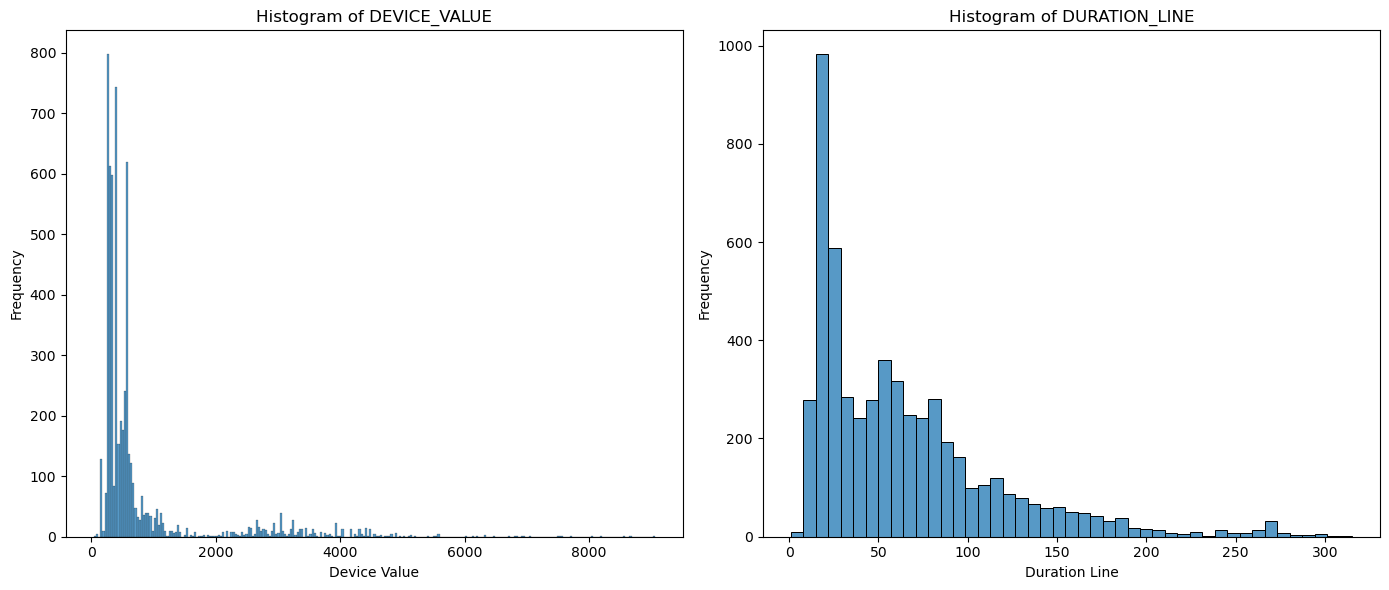

In [14]:

plt.figure(figsize=(14, 6))

# histogram for DEVICE_VALUE
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
ax1 = sns.histplot(imputed_data['DEVICE_VALUE'], kde=False)
ax1.set(title='Histogram of DEVICE_VALUE', xlabel='Device Value', ylabel='Frequency')

# histogram for DURATION_LINE
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
ax2 = sns.histplot(imputed_data['DURATION_LINE'], kde=False)
ax2.set(title='Histogram of DURATION_LINE', xlabel='Duration Line', ylabel='Frequency')

plt.tight_layout()
plt.show()

Both graphics show a quick descent in the first steps that gradually decreases each time slowlier. That looks like the negative of an exponential distribution.

<font size="+1" color="red">Replace this cell with a series of cells with code to plot a histogram comparing **VOICE\_TRAFFIC\_MONTH\_1** against **VOICE\_TRAFFIC\_MONTH\_6**, and **BILLING\_MONTH\_1** against **BILLING\_MONTH\_6**. Remember to include a title, labels on the x axis and y axis, and a legend.</font>

<font size="+1" color="red">Both plots should use logarithmic scale on the y axis</font>

<font size="+1" color="red">Include after both histograms your comment on the differences between month 1 and month 6.</font>

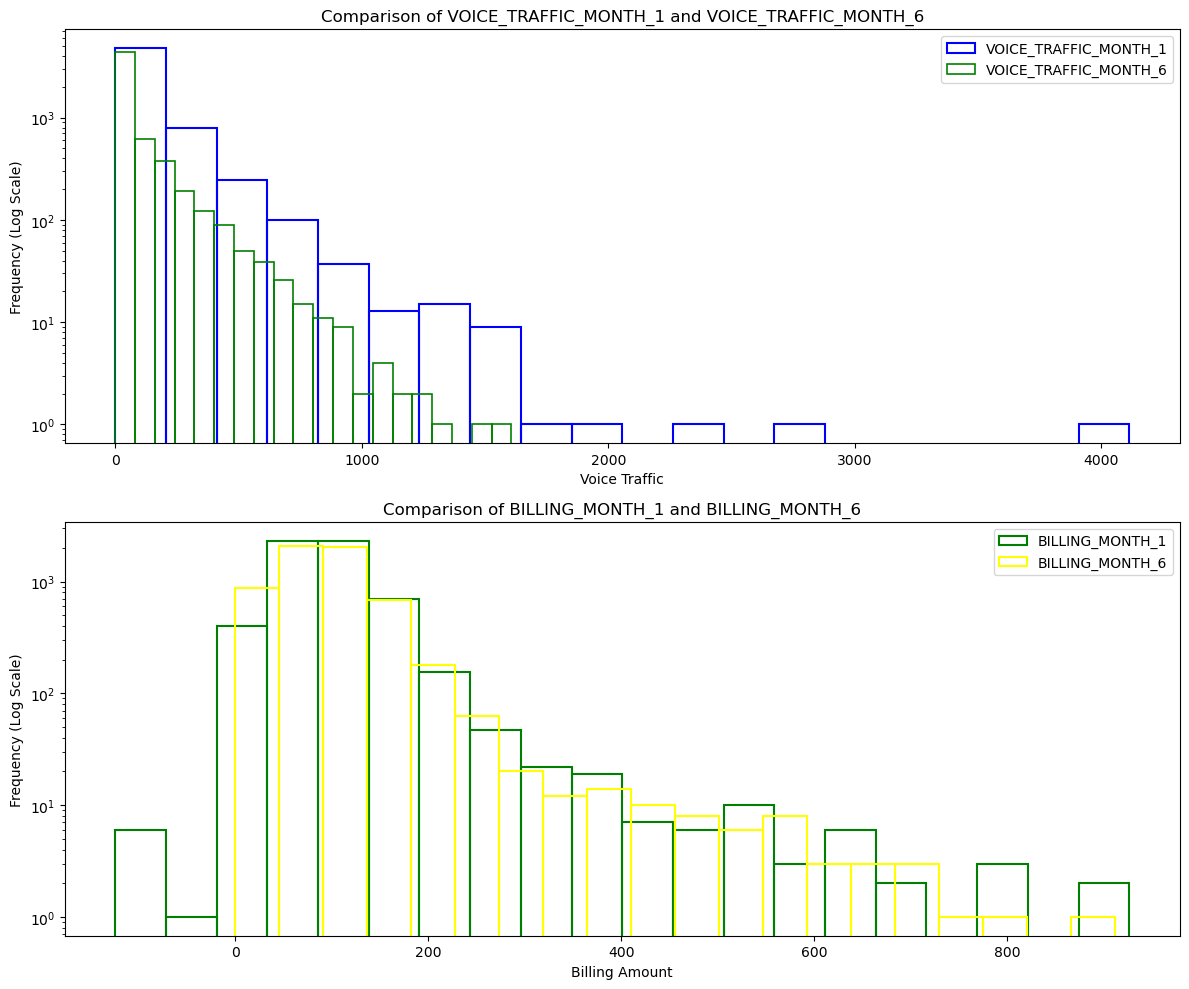

In [15]:

plt.figure(figsize=(12, 10))

# histogram for VOICE TRAFFIC
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
sns.histplot(data=imputed_data, x='VOICE_TRAFFIC_MONTH_1', bins=20, fill=False, label='VOICE_TRAFFIC_MONTH_1', color='blue')
sns.histplot(data=imputed_data, x='VOICE_TRAFFIC_MONTH_6', bins=20, fill=False, label='VOICE_TRAFFIC_MONTH_6', color='green')
plt.yscale('log')  
plt.title('Comparison of VOICE_TRAFFIC_MONTH_1 and VOICE_TRAFFIC_MONTH_6')
plt.xlabel('Voice Traffic')
plt.ylabel('Frequency (Log Scale)')
plt.legend()

# histogram for BILLING MONTH
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
sns.histplot(data=imputed_data, x='BILLING_MONTH_1', bins=20, fill=False, label='BILLING_MONTH_1', color='green')
sns.histplot(data=imputed_data, x='BILLING_MONTH_6', bins=20, fill=False, label='BILLING_MONTH_6', color='yellow')
plt.yscale('log')  
plt.title('Comparison of BILLING_MONTH_1 and BILLING_MONTH_6')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency (Log Scale)')
plt.legend()


plt.tight_layout()
plt.show()

Concerning the Voice Traffic, we can see that for low voice traffic values, the frequency in both month 1 and 6 is pretty similar and quite high in both cases, but as the voice traffic value increases, the frequency decreases notably. However, it can be seen that it decreases much faster in month 6 than in month 1, that is, the gap between the frequency of month 1 and month 6 is greater every time. Besides, in month 6 there are no samples with value greater than 1500 aprox., whereas in month 1 it reaches even 4000. 

On the other side, there is not such a difference regarding frequencies on the billing amount on months 1 and 6, both graphics follow a quite similar shape. We can point out that in month 1 there are some negative values present which are not in month 6; and that for big values of billing amount (>700) there's a quite significant difference among month 1 and 6, having first month more frequency.

<font size="+1" color="red">Replace this cell with code to apply **log(x+1)** to **VOICE\_TRAFFIC\_MONTH\_1** and plot its new distribution.</font>

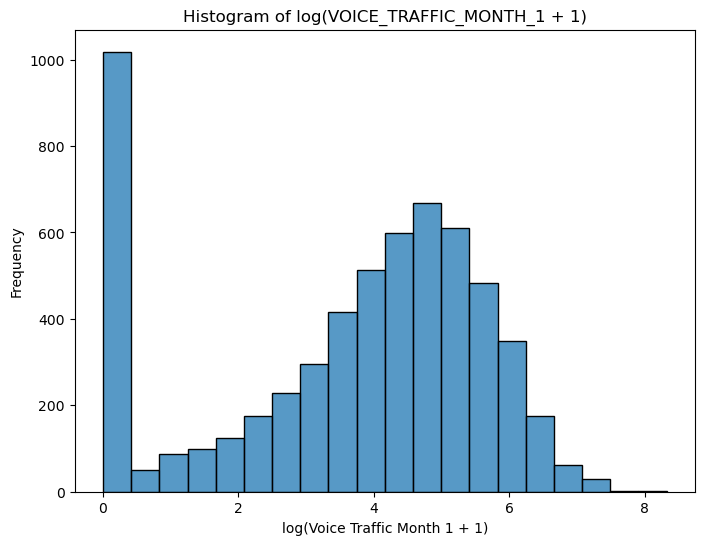

In [16]:
imputed_data['VOICE_TRAFFIC_MONTH_1_log'] = np.log1p(imputed_data['VOICE_TRAFFIC_MONTH_1'])

plt.figure(figsize=(8, 6))
ax = sns.histplot(imputed_data['VOICE_TRAFFIC_MONTH_1_log'], bins=20, kde=False)
ax.set(title='Histogram of log(VOICE_TRAFFIC_MONTH_1 + 1)', xlabel='log(Voice Traffic Month 1 + 1)', ylabel='Frequency')
plt.show()

<font size="+1" color="red">Replace this cell with code to create thre boxplots, each of them for one of the  variables **DATA\_TRAFFIC\_MONTH\_6**, **VOICE\_TRAFFIC\_MONTH\_6** and **BILLING\_MONTH\_6**. Remember to include a title and a label for the y axis.</font>

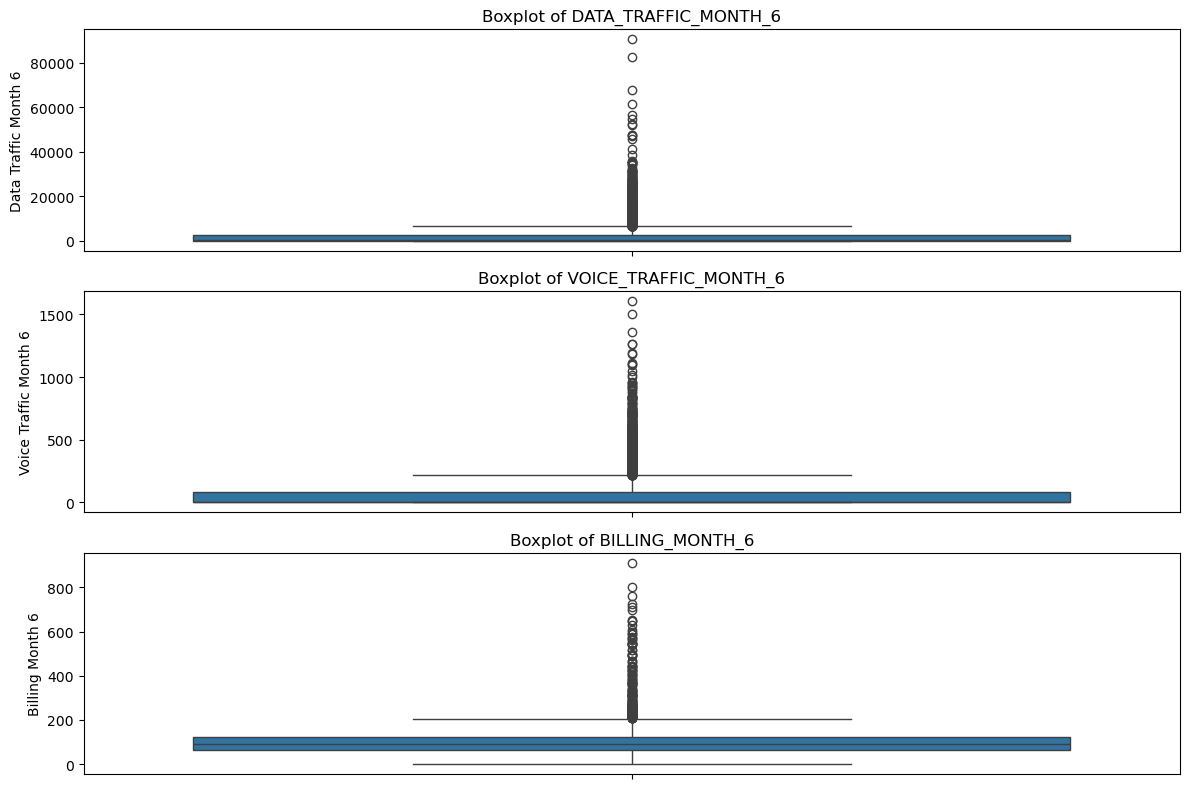

In [17]:
plt.figure(figsize=(12, 8))

# Boxplot for DATA_TRAFFIC_MONTH_6
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
sns.boxplot(y=imputed_data['DATA_TRAFFIC_MONTH_6'])
plt.title('Boxplot of DATA_TRAFFIC_MONTH_6')
plt.ylabel('Data Traffic Month 6')

# Boxplot for VOICE_TRAFFIC_MONTH_6
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
sns.boxplot(y=imputed_data['VOICE_TRAFFIC_MONTH_6'])
plt.title('Boxplot of VOICE_TRAFFIC_MONTH_6')
plt.ylabel('Voice Traffic Month 6')

# Boxplot for BILLING_MONTH_6
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
sns.boxplot(y=imputed_data['BILLING_MONTH_6'])
plt.title('Boxplot of BILLING_MONTH_6')
plt.ylabel('Billing Month 6')

plt.tight_layout()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary indicating which extreme values would you use as threshold for **outliers** in these variables, by looking at these box plots</font>

Regarding data traffic, I would set the threshold for outliers to 50000.
In the voice traffic I would set it to 1150.
Finally I would set the threshold for outliers of billing month to 700.

<font size="+1" color="red">Replace this cell with code to calculate the correlation between all traffic attributes (i.e., voice and data), duration line, billing, device cost and device value. Display the result as a table with rows and columns corresponding to columns, and cells indicating correlations. Display the result as an image using ``matshow``</font>

Correlation Matrix:
                       VOICE_TRAFFIC_MONTH_1  VOICE_TRAFFIC_MONTH_2  \
VOICE_TRAFFIC_MONTH_1                   1.00                   0.82   
VOICE_TRAFFIC_MONTH_2                   0.82                   1.00   
VOICE_TRAFFIC_MONTH_3                   0.80                   0.98   
VOICE_TRAFFIC_MONTH_4                   0.74                   0.83   
VOICE_TRAFFIC_MONTH_5                   0.73                   0.81   
VOICE_TRAFFIC_MONTH_6                   0.44                   0.51   
DATA_TRAFFIC_MONTH_1                    0.09                   0.07   
DATA_TRAFFIC_MONTH_2                    0.08                   0.08   
DATA_TRAFFIC_MONTH_3                    0.08                   0.08   
DATA_TRAFFIC_MONTH_4                    0.09                   0.09   
DATA_TRAFFIC_MONTH_5                    0.09                   0.09   
DATA_TRAFFIC_MONTH_6                    0.08                   0.08   
DURATION_LINE                           0.02             

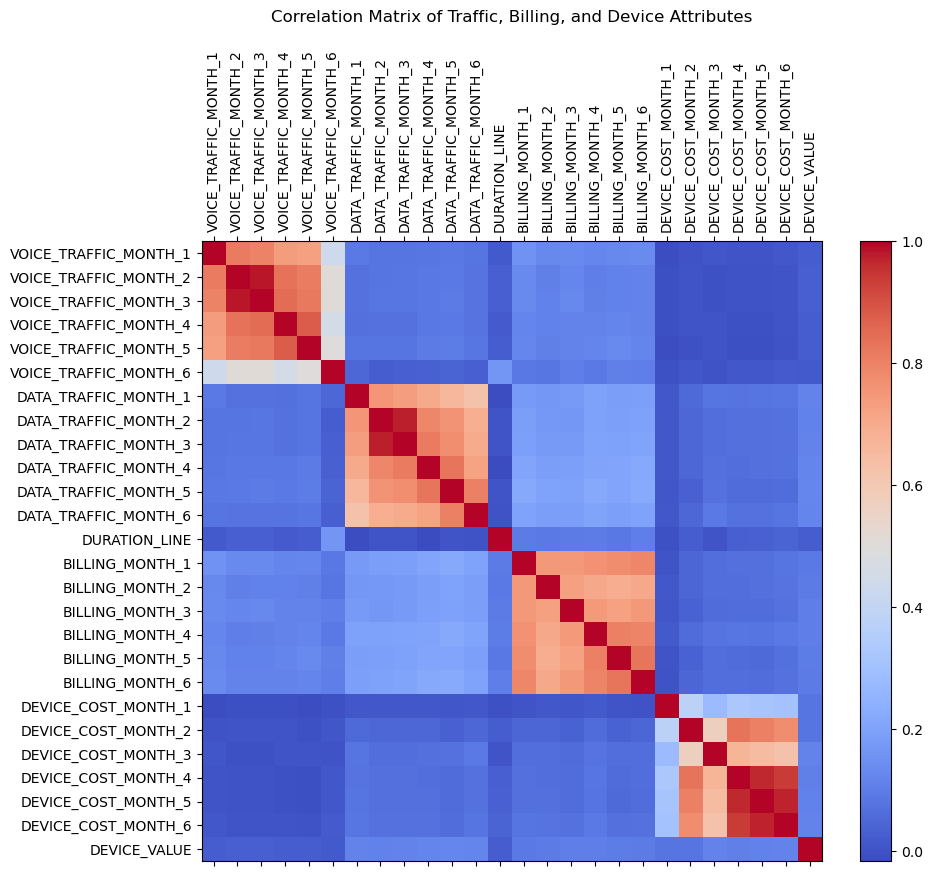

In [18]:
relevant_columns = [
    'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6', 
    'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
    'DURATION_LINE', 'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6', 
    'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6', 'DEVICE_VALUE'
]


correlation_matrix = imputed_data[relevant_columns].corr(method='pearson', numeric_only=True)


print("Correlation Matrix:")
print(correlation_matrix)


plt.figure(figsize=(10, 8)) 
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')  
plt.colorbar()  


plt.xticks(range(len(relevant_columns)), relevant_columns, rotation=90)  
plt.yticks(range(len(relevant_columns)), relevant_columns)  

plt.title('Correlation Matrix of Traffic, Billing, and Device Attributes', pad=20)
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on the results. Is the billing more correlated, in general, with the data traffic or with the voice traffic?</font>

The image of the correlation matrix allows us to see that these features do not have strong correlations among them except for those that are the same feature in different months(data traffic months between each other, billing months between each other, etc.). The rest of them we can see the blue color which implies a weak correlation.
As for the correlation with billing and data and voice, it is weak in both cases (easy to see as they are both blue, however we can already see one is a bit lightert than the other) but is we look at the numbers, we can see that it is slightly higher in the data case. Hence we can say that billing is more correlated with data traffic than with voice traffic. 

## 2.3. Date management and period calculation

<font size="+1" color="red">Replace this cell with code to create and print `latest_change` and `now`.</font>

In [19]:
#create new dataframe for this section as it will require to drop some nulls
df_mobile = imputed_data.copy()
#must drop the null values to convert to int (if we convert to 0 then we won't be able to convert to date format, need to drop them)
df_mobile = df_mobile.dropna(subset=["LAST_DEVICE_CHANGE"])
df_mobile['LAST_DEVICE_CHANGE_INT'] = df_mobile['LAST_DEVICE_CHANGE'].astype(int)

max_device_change = df_mobile['LAST_DEVICE_CHANGE_INT'].max()

max_device_change_str = str(max_device_change)

latest_change = datetime.datetime.strptime(max_device_change_str, "%Y%m%d")

now = latest_change + datetime.timedelta(days=30)

print("Latest change:", latest_change)
print("Now (30 days after latest change):", now)

Latest change: 2019-05-01 00:00:00
Now (30 days after latest change): 2019-05-31 00:00:00


<font size="+1" color="red">Replace this cell with code that replaces the **MONTHS_LAST_DEVICE** column to be equal to the difference, in periods of 30 days, between **LAST_DEVICE_CHANGE** and the `now` variable.</font>

In [20]:
series_converted = pd.to_datetime(df_mobile['LAST_DEVICE_CHANGE_INT'], format='%Y%m%d')

difference_in_days = (now - series_converted)

months_difference = difference_in_days / (30 * datetime.timedelta(days=1))

df_mobile['MONTHS_LAST_DEVICE'] = months_difference.fillna(0).astype(int)

print(df_mobile[['LAST_DEVICE_CHANGE_INT', 'MONTHS_LAST_DEVICE']].head())

   LAST_DEVICE_CHANGE_INT  MONTHS_LAST_DEVICE
1                20170401                  26
3                20171001                  20
4                20190101                   5
5                20170901                  21
6                20150701                  47


<font size="+1" color="red">Replace this cell with code to update the **DURATION_LINE** value to be the difference, in days, between **LINE_ACTIVATION_DATE** and the `now` variable. Indicate the average of **DURATION_LINE** -- what is that in years, approximately?</font>

In [21]:
df_mobile['LINE_ACTIVATION_DATE_INT'] = df_mobile['LINE_ACTIVATION_DATE'].astype(int)
line_activation_converted = pd.to_datetime(df_mobile['LINE_ACTIVATION_DATE_INT'].astype(str), format='%Y%m%d')

df_mobile['DURATION_LINE'] = (now - line_activation_converted).dt.days

average_duration_days = df_mobile['DURATION_LINE'].mean()

average_duration_years = average_duration_days / 365

print(f"Average DURATION_LINE: {average_duration_days} days")
print(f"Average DURATION_LINE in years (approx): {average_duration_years:.2f} years")

print(df_mobile[['LINE_ACTIVATION_DATE_INT', 'DURATION_LINE']].head())

Average DURATION_LINE: 1768.7560122431132 days
Average DURATION_LINE in years (approx): 4.85 years
   LINE_ACTIVATION_DATE_INT  DURATION_LINE
1                  20170405            786
3                  20110825           2836
4                  20140617           1809
5                  20170905            633
6                  20100809           3217



## 2.4. Standarization and scaling of numerical variables

<font size="+1" color="red">Replace this cell with code to standardize and min-max scale the **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1**, **BILLING_MONTH_1** and **DEVICE_COST_MONTH_1** columns. Save the results in new colums with the same name followed by **_STANDARD** and **_MINMAX** (e.g., DATA\_TRAFFIC\_MONTH\_1\_STAND, DATA\_TRAFFIC\_MONTH\_1\_MINMAX). Plot a histogram for each new variable.</font>



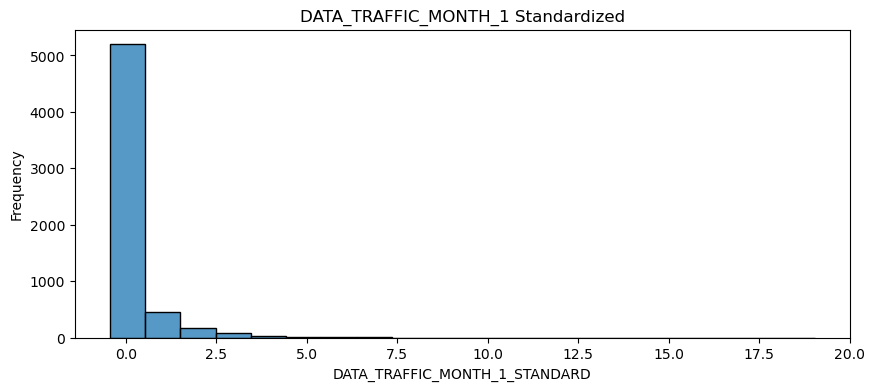

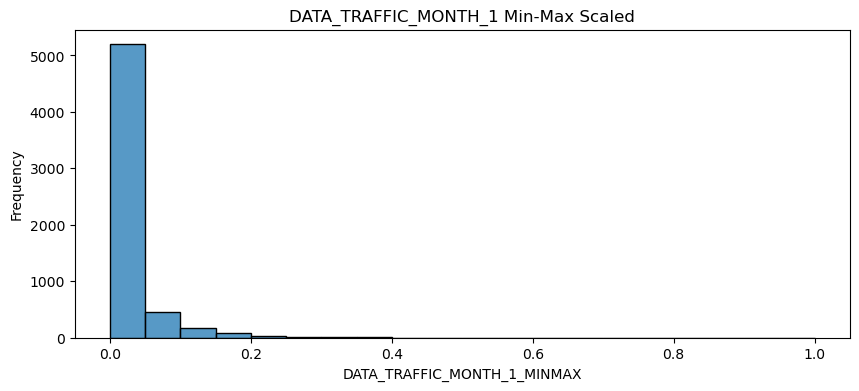

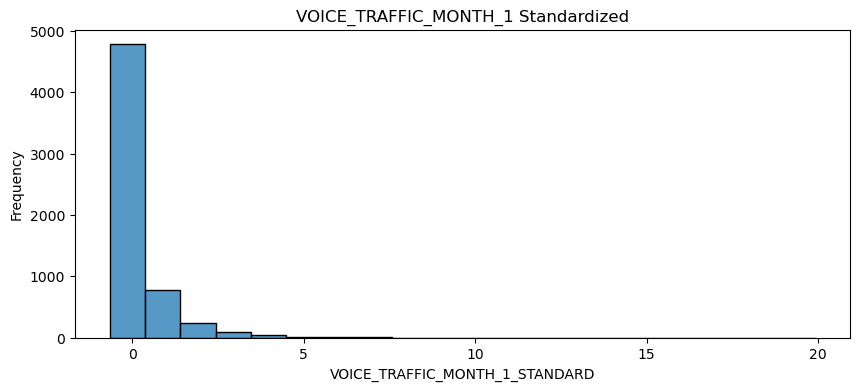

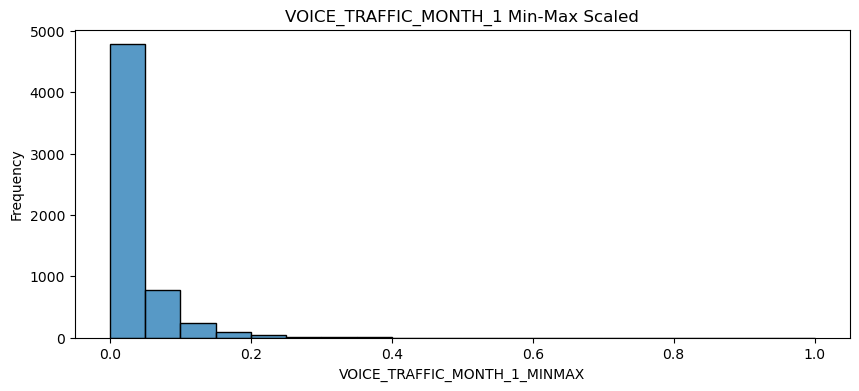

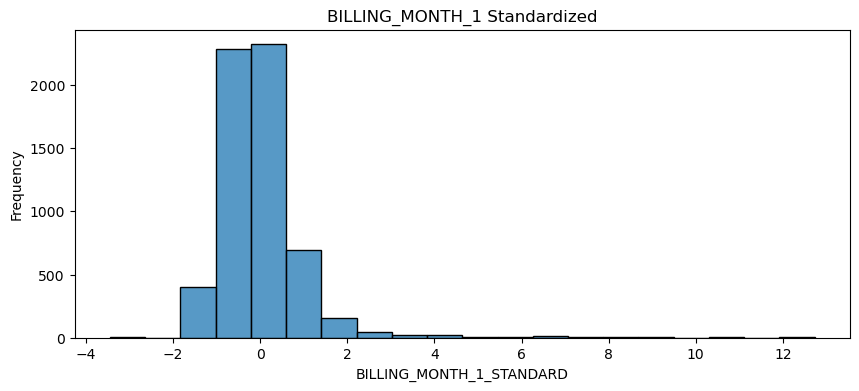

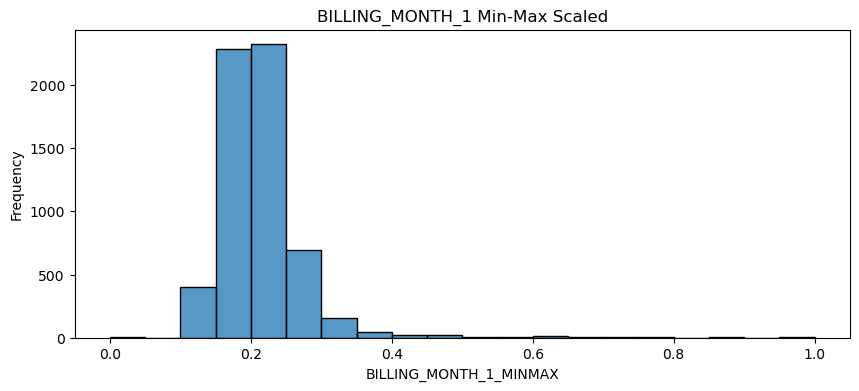

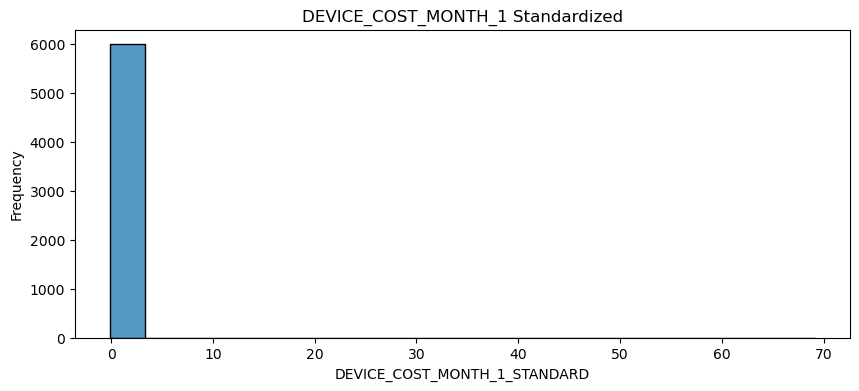

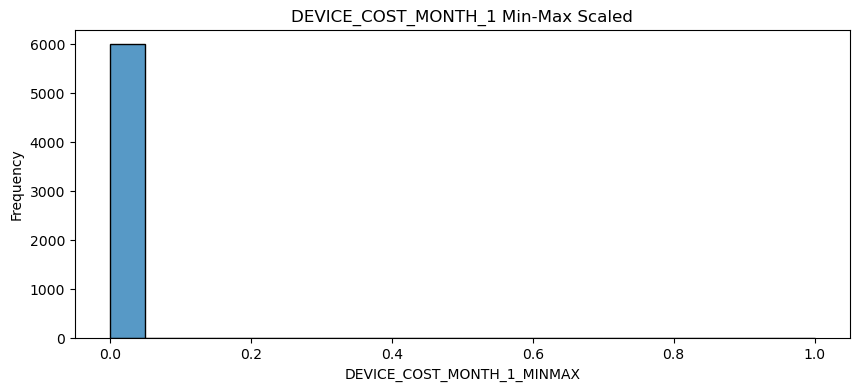

In [22]:
#we go back to the imputed dataset before last section
columns_to_scale = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1', 'DEVICE_COST_MONTH_1']

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

for col in columns_to_scale:
    imputed_data[f'{col}_STANDARD'] = standard_scaler.fit_transform(imputed_data[[col]])
    
    imputed_data[f'{col}_MINMAX'] = minmax_scaler.fit_transform(imputed_data[[col]])

for col in columns_to_scale:
    plt.figure(figsize=(10, 4))
    ax1 = sns.histplot(imputed_data[f'{col}_STANDARD'], bins=20, kde=False)
    ax1.set(title=f'{col} Standardized', xlabel=f'{col}_STANDARD', ylabel='Frequency')
    plt.show()
    
    plt.figure(figsize=(10, 4))
    ax2 = sns.histplot(imputed_data[f'{col}_MINMAX'], bins=20, kde=False)
    ax2.set(title=f'{col} Min-Max Scaled', xlabel=f'{col}_MINMAX', ylabel='Frequency')
    plt.show()

## 2.5. Convert categorical columns to dummy binary variables

<font size="+1" color="red">Create variable **PREVIOUS_DEVICE_BRAND_INT_ENCODED** containing an integer encoding of variable **PREVIOUS_DEVICE_BRAND**.</font>

In [23]:
label_encoder = LabelEncoder()

imputed_data['PREVIOUS_DEVICE_BRAND_INT_ENCODED'] = label_encoder.fit_transform(imputed_data['PREVIOUS_DEVICE_BRAND'])

print(imputed_data[['PREVIOUS_DEVICE_BRAND', 'PREVIOUS_DEVICE_BRAND_INT_ENCODED']].head())

  PREVIOUS_DEVICE_BRAND  PREVIOUS_DEVICE_BRAND_INT_ENCODED
0              Motorola                                  2
1               Samsung                                  4
2              Motorola                                  2
3                 Apple                                  0
4                Outros                                  3


<font size="+1" color="red">Replace this cell with code to convert **PREVIOUS_DEVICE_MANUF** to dummy binary variables.</font>

In [24]:
device_manuf_dummies = pd.get_dummies(imputed_data['PREVIOUS_DEVICE_MANUF'], prefix='manufacturer')

imputed_data_with_dummies = imputed_data.join(device_manuf_dummies)

display(imputed_data_with_dummies)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,manufacturer_Telit Communications SpA,manufacturer_Topmax Glory Limited,manufacturer_Umi Network Technology Co Limited,manufacturer_United Mobile,manufacturer_United Time Hong Kong Ltd,manufacturer_Vikin Communication Technology Co Limited,manufacturer_Vogtec (H.K) Co Ltd,manufacturer_Xiaomi Communications Co Ltd,manufacturer_ZTE Corporation,manufacturer_u-blox AG
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,False,False,False,False,False,False,False,False,False,False
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,False,False,False,False,False,False,False,False,False,False
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,False,False,False,False,False,False,False,False,False,False
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,False,False,False,False,False,False,False,False,False,False
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaN,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,False,False,False,False,False,False,False,False,False,False
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,False,False,False,False,False,False,False,False,False,False
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,False,False,False,False,False,False,False,False,False,False
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,NaN,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,False,False,False,False,False,False,False,False,False,False


## 2.6. Feature generation

<font size="+1" color="red">Replace this cell with code to create from the 6 months of **DATA_TRAFFIC\_MONTH\_[1-6]**, **VOICE_TRAFFIC\_MONTH\_[1-6]**, **BILLING\_MONTH\_[1-6]** and **DEVICE_COST\_MONTH\_[1-6]**, new columns with the mean, maximum, minimum, range (i.e., difference between maximum and minimum) for each element. For instance, column **DATA_TRAFFIC_MEAN** should contain the average of these six numbers: **DATA_TRAFFIC_MONTH_1**, **DATA_TRAFFIC_MONTH_2**, ..., **DATA_TRAFFIC_MONTH_6**.</font>

In [25]:
data_traffic_columns = [f'DATA_TRAFFIC_MONTH_{i}' for i in range(1, 7)]
voice_traffic_columns = [f'VOICE_TRAFFIC_MONTH_{i}' for i in range(1, 7)]
billing_columns = [f'BILLING_MONTH_{i}' for i in range(1, 7)]
device_cost_columns = [f'DEVICE_COST_MONTH_{i}' for i in range(1, 7)]

imputed_data['DATA_TRAFFIC_MEAN'] = imputed_data[data_traffic_columns].mean(axis=1)
imputed_data['DATA_TRAFFIC_MAX'] = imputed_data[data_traffic_columns].max(axis=1)
imputed_data['DATA_TRAFFIC_MIN'] = imputed_data[data_traffic_columns].min(axis=1)
imputed_data['DATA_TRAFFIC_RANGE'] = imputed_data['DATA_TRAFFIC_MAX'] - imputed_data['DATA_TRAFFIC_MIN']

imputed_data['VOICE_TRAFFIC_MEAN'] = imputed_data[voice_traffic_columns].mean(axis=1)
imputed_data['VOICE_TRAFFIC_MAX'] = imputed_data[voice_traffic_columns].max(axis=1)
imputed_data['VOICE_TRAFFIC_MIN'] = imputed_data[voice_traffic_columns].min(axis=1)
imputed_data['VOICE_TRAFFIC_RANGE'] = imputed_data['VOICE_TRAFFIC_MAX'] - imputed_data['VOICE_TRAFFIC_MIN']

imputed_data['BILLING_MEAN'] = imputed_data[billing_columns].mean(axis=1)
imputed_data['BILLING_MAX'] = imputed_data[billing_columns].max(axis=1)
imputed_data['BILLING_MIN'] = imputed_data[billing_columns].min(axis=1)
imputed_data['BILLING_RANGE'] = imputed_data['BILLING_MAX'] - imputed_data['BILLING_MIN']

imputed_data['DEVICE_COST_MEAN'] = imputed_data[device_cost_columns].mean(axis=1)
imputed_data['DEVICE_COST_MAX'] = imputed_data[device_cost_columns].max(axis=1)
imputed_data['DEVICE_COST_MIN'] = imputed_data[device_cost_columns].min(axis=1)
imputed_data['DEVICE_COST_RANGE'] = imputed_data['DEVICE_COST_MAX'] - imputed_data['DEVICE_COST_MIN']

display(imputed_data[['DATA_TRAFFIC_MEAN', 'DATA_TRAFFIC_MAX', 'DATA_TRAFFIC_MIN', 'DATA_TRAFFIC_RANGE',
                       'VOICE_TRAFFIC_MEAN', 'VOICE_TRAFFIC_MAX', 'VOICE_TRAFFIC_MIN', 'VOICE_TRAFFIC_RANGE',
                       'BILLING_MEAN', 'BILLING_MAX', 'BILLING_MIN', 'BILLING_RANGE',
                       'DEVICE_COST_MEAN', 'DEVICE_COST_MAX', 'DEVICE_COST_MIN', 'DEVICE_COST_RANGE']].head())

,DATA_TRAFFIC_MEAN,DATA_TRAFFIC_MAX,DATA_TRAFFIC_MIN,DATA_TRAFFIC_RANGE,VOICE_TRAFFIC_MEAN,VOICE_TRAFFIC_MAX,VOICE_TRAFFIC_MIN,VOICE_TRAFFIC_RANGE,BILLING_MEAN,BILLING_MAX,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE
0,646.06,1169.40,398.99,770.40,40.72,79.70,21.80,57.90,92.96,107.93,85.00,22.93,12.00,12.00,12.00,0.00
1,376.58,704.89,232.24,472.64,3.07,4.90,0.50,4.40,49.44,56.56,47.00,9.56,0.00,0.00,0.00,0.00
2,332.10,484.62,250.74,233.88,114.10,218.70,26.10,192.60,121.78,129.14,113.77,15.37,0.00,0.00,0.00,0.00
3,1178.09,4255.46,146.77,4108.69,185.30,231.20,119.00,112.20,58.22,60.93,55.99,4.94,6.00,6.00,6.00,0.00
4,2729.06,5014.10,1553.12,3460.99,63.98,383.90,0.00,383.90,109.70,110.69,107.99,2.70,0.00,0.00,0.00,0.00


<font size="+1" color="red">Replace this cell with code create an additional column **DEVICE_COST_TO_BILLING_RATIO** containing the ratio between **DEVICE_COST_MEAN** and **BILLING_MEAN** and plot its distribution.</font>

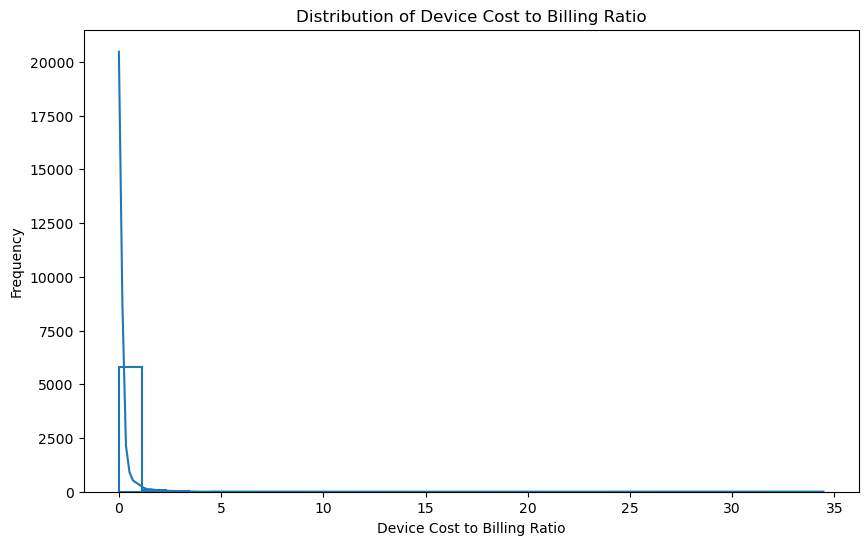

In [26]:
imputed_data['DEVICE_COST_TO_BILLING_RATIO'] = imputed_data['DEVICE_COST_MEAN'] / imputed_data['BILLING_MEAN']

plt.figure(figsize=(10, 6))
sns.histplot(imputed_data['DEVICE_COST_TO_BILLING_RATIO'], bins=30, kde=True, fill=False)
plt.title('Distribution of Device Cost to Billing Ratio')
plt.xlabel('Device Cost to Billing Ratio')
plt.ylabel('Frequency')

plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on the distribution of the variable **DEVICE_COST_TO_BILLING_RATIO**. Can you recognize its distribution?</font>

Once again, it looks like a negative exponential distribution. It shows us that the vast majority have a good ratio between the cost of their device and what they are billed. However, there are some outliers, although with a very low ratio value, since the curve reaches almost 0 in the first decrease.

## 2.7. Text parsing/processing

<font size="+1" color="red">Replace this cell with code to use the **PURCHASED_DEVICE** variable to create 3 new columns with the following variables names: **PURCHASED_DEVICE_CODE**, **PURCHASED_DEVICE_MANUFACTURER** and **PURCHASED_DEVICE_MODEL**.</font>

In [27]:
def split_purchased_device(device):
    parts = device.split('_', 1)  # Split into two parts only (before and after ;)
    if len(parts) == 2:
        code = parts[0]
        rest = parts[1].strip()
        manufacturer_and_model = rest.split(maxsplit=1)  # Split only at the first space to separate manufacturer and model
        if len(manufacturer_and_model) == 2:
            manufacturer = manufacturer_and_model[0]
            model = manufacturer_and_model[1]
        else:
            manufacturer = manufacturer_and_model[0]  # If no model is found, take the whole rest
            model = None  # Assign None if no model part is available
    else:
        code = None
        manufacturer = None
        model = None

    return pd.Series([code, manufacturer, model])

imputed_data[['PURCHASED_DEVICE_CODE', 'PURCHASED_DEVICE_MANUFACTURER', 'PURCHASED_DEVICE_MODEL']] = imputed_data['PURCHASED_DEVICE'].apply(split_purchased_device)

display(imputed_data[['PURCHASED_DEVICE', 'PURCHASED_DEVICE_CODE', 'PURCHASED_DEVICE_MANUFACTURER', 'PURCHASED_DEVICE_MODEL']].head())

,PURCHASED_DEVICE,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO


<font size="+1" color="red">Replace this cell with code to create two tables: one with the number of devices per manufacturer in **PURCHASED_DEVICE_MANUFACTURER** and one with the number of devices per manufacturer in  **PREVIOUS_DEVICE_MANUF**.

In [28]:
devices_per_manufacturer_current = imputed_data['PURCHASED_DEVICE_MANUFACTURER'].value_counts().reset_index()
devices_per_manufacturer_current.columns = ['Manufacturer', 'Device Count']

devices_per_manufacturer_previous = imputed_data['PREVIOUS_DEVICE_MANUF'].value_counts().reset_index()
devices_per_manufacturer_previous.columns = ['Manufacturer', 'Device Count']

print("Devices per Manufacturer (Current):")
display(devices_per_manufacturer_current)

print("\nDevices per Manufacturer (Previous):")
display(devices_per_manufacturer_previous)

Devices per Manufacturer (Current):


,Manufacturer,Device Count
0,LG,3556
1,SAMSUNG,1094
2,MOTOROLA,630
3,APPLE,448
4,ALCATEL,258
5,ASUS,2



Devices per Manufacturer (Previous):


,Manufacturer,Device Count
0,Samsung Korea,1879
1,Apple Inc,1495
2,"Motorola Mobility LLC, a Lenovo Company",849
3,LG Electronics Inc.,506
4,TCL Communication Ltd,279
...,...,...
62,Lanxun Technology (Hong Kong) Limited,1
63,Beijing Flyscale Technologies Company Limited,1
64,Meizu Technology Co Ltd,1
65,TP-Link Technologies Co Ltd,1


## 2.8. Splitting and sampling a dataset

<font size="+1" color="red">Replace this cell with code to split the dataset in two separate datasets: one with 70% of the rows and the other with 30% of rows</font>

In [29]:
train_data, test_data = train_test_split(imputed_data, test_size=0.3, random_state=42)

print(f"Training dataset shape: {train_data.shape}")
print(f"Testing dataset shape: {test_data.shape}")

Training dataset shape: (4191, 63)
Testing dataset shape: (1797, 63)


<font size="+1" color="red">Replace this cell with code to compute the main statistics (mean, standard deviation, min, max, 25%, 50%, 75%) for the variables **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1** and **BILLING_MONTH_1** in both training and testing parts of the dataset.</font>

<font size="+1" color="red">Replace this cell with a brief commentary indicating if you find these statistics match between the two splits, or do not match between them.</font>

In [30]:
columns_of_interest = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']

train_stats = train_data[columns_of_interest].describe().T
train_stats['std'] = train_data[columns_of_interest].std() 

test_stats = test_data[columns_of_interest].describe().T
test_stats['std'] = test_data[columns_of_interest].std()  

print("Statistics for Training Dataset:")
display(train_stats)
print("\nStatistics for Testing Dataset:")
display(test_stats)

Statistics for Training Dataset:


,count,mean,std,min,25%,50%,75%,max
DATA_TRAFFIC_MONTH_1,4191.00,2549.41,5612.93,0.00,0.00,399.50,2842.26,112421.17
VOICE_TRAFFIC_MONTH_1,4191.00,132.02,203.67,0.00,10.20,64.20,171.55,4113.00
BILLING_MONTH_1,4191.00,100.03,65.03,-124.49,63.36,92.99,121.14,911.72



Statistics for Testing Dataset:


,count,mean,std,min,25%,50%,75%,max
DATA_TRAFFIC_MONTH_1,1797.00,2567.66,6135.75,0.00,0.00,346.78,2419.70,97074.62
VOICE_TRAFFIC_MONTH_1,1797.00,127.12,191.84,0.00,9.20,58.70,165.20,2377.90
BILLING_MONTH_1,1797.00,98.42,64.83,-21.03,63.00,92.69,120.84,926.41


We can see that most statistics are similar between the testing and training dataset except for the min and max one. This is normal and can be explained because all data follows some distribution, and in both splits it is very likely to keep the distribution in a quite similar way, that's why the mean values, standard deviation, etc. have close values in both datasets. However, when splitting there is no control of where the extreme values will fall, hence it is normal that they are much different in both dataset (for instance, the top 10 values of a feature can all go in the training dataset, and in that case its maximum would be much greater than that of the testing one).

# 3. Comparing iPhone and Samsung J series users

<font size="+1" color="red">Replace this cell with code to create two dataframes: one with all the attributes of Apple iPhone users and one with all the attributes of Samsung J series users.</font>

In [31]:
apple_users_df = imputed_data[imputed_data['PURCHASED_DEVICE_MANUFACTURER'] == 'APPLE']

samsung_users_df = imputed_data[imputed_data['PURCHASED_DEVICE_MANUFACTURER'] == 'SAMSUNG']
samsung_users_df = samsung_users_df[samsung_users_df['PURCHASED_DEVICE_MODEL'].str.startswith('J')]

display(apple_users_df)
display(samsung_users_df)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.00,20170101.00,1520.21,2196.57,2196.57,1815.70,2101.68,3224.28,206.90,...,115.00,71.31,13.00,13.00,13.00,0.00,0.09,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
18,DGAP067C2000_APPLE IPHONE 8 64GB CINZA PPB/PI6...,3081.00,20170901.00,990.28,1011.10,1011.10,1025.97,2778.35,1822.95,102.90,...,60.99,2.96,124.00,124.00,124.00,0.00,1.98,DGAP067C2000,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
39,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3681.00,20161001.00,3916.90,2703.32,2703.32,1860.90,3112.77,2625.42,160.90,...,192.84,105.96,122.00,183.00,0.00,183.00,0.50,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
52,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2841.00,20170901.00,1017.51,1079.26,1079.26,1178.98,1192.97,1070.23,303.20,...,148.99,39.76,7.00,7.00,7.00,0.00,0.04,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
53,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2961.00,20170901.00,257.39,604.09,604.09,1394.24,102.60,107.84,117.30,...,74.99,60.00,7.00,7.00,7.00,0.00,0.08,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3345.00,20171001.00,8028.23,4791.40,4791.40,4890.19,6867.36,4825.10,31.40,...,69.99,3.00,84.23,252.70,0.00,252.70,1.17,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
9891,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.00,20180101.00,3636.14,3975.19,3975.19,4893.02,4364.04,3992.30,18.50,...,69.99,0.47,0.00,0.00,0.00,0.00,0.00,DGAP08163000,APPLE,IPHONE XR 64GB PRETO
9892,DGAP069C3000_APPLE IPHONE 8 PLUS 64GB CINZA BA...,3777.00,20170101.00,1023.12,2831.42,2831.42,3015.21,2819.56,1135.82,51.70,...,123.99,3.00,13.00,13.00,13.00,0.00,0.10,DGAP069C3000,APPLE,IPHONE 8 PLUS 64GB CINZA BASICO
9917,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.00,20180101.00,2432.91,5159.85,5159.85,3041.39,2613.58,2976.49,85.40,...,69.99,0.00,0.00,0.00,0.00,0.00,0.00,DGAP08163000,APPLE,IPHONE XR 64GB PRETO


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
12,TGSA32062000_SAMSUNG J415G SMART PRETO PPB/PI1...,921.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,171.30,...,113.85,56.53,0.00,0.00,0.00,0.00,0.00,TGSA32062000,SAMSUNG,J415G SMART PRETO PPB/PI107/04
23,TGSA32564007_SAMSUNG J260M SMART PRETO PPB/PI...,633.00,20160801.00,4.53,464.09,695.10,223.33,223.33,247.85,298.00,...,45.59,24.30,2.50,15.00,0.00,15.00,0.04,TGSA32564007,SAMSUNG,J260M SMART PRETO PPB/PI324/14
33,TGSA32162007_SAMSUNG J610G SMART PRETO PPB/PI1...,705.00,20141001.00,8396.93,9907.53,9907.53,5994.02,6872.61,5246.00,153.00,...,146.95,93.09,47.33,71.00,0.00,71.00,0.28,TGSA32162007,SAMSUNG,J610G SMART PRETO PPB/PI107/04
57,TGSA31562000_SAMSUNG J810M SMART PRETO PPB/PI1...,1545.00,20140101.00,2047.26,1597.99,1597.99,1501.05,843.06,1631.07,74.40,...,183.99,5.64,0.00,0.00,0.00,0.00,0.00,TGSA31562000,SAMSUNG,J810M SMART PRETO PPB/PI107/04
58,TGSA31362000_SAMSUNG J400M SMART PRETO PPB/PI1...,873.00,20140101.00,4185.32,2036.57,2036.57,424.27,2934.92,2847.61,61.00,...,112.99,42.95,0.00,0.00,0.00,0.00,0.00,TGSA31362000,SAMSUNG,J400M SMART PRETO PPB/PI107/04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9861,TGSA32164007_SAMSUNG J610G SMART PRETO PPB/PI3...,1065.00,20170101.00,5344.53,3875.46,3875.46,2059.95,6818.61,2639.69,903.30,...,78.13,40.40,33.00,33.00,33.00,0.00,0.39,TGSA32164007,SAMSUNG,J610G SMART PRETO PPB/PI324/14
9966,TGSA31562000_SAMSUNG J810M SMART PRETO PPB/PI1...,1137.00,NaN,4343.87,5593.43,5593.43,4548.75,80.53,1497.05,10.60,...,117.99,3.15,0.00,0.00,0.00,0.00,0.00,TGSA31562000,SAMSUNG,J810M SMART PRETO PPB/PI107/04
9971,TGSA28564007_SAMSUNG J105 SMART PRETO PPB/PI3...,441.00,20180201.00,0.00,0.00,0.00,0.00,0.00,0.00,161.30,...,69.99,8.27,13.00,13.00,13.00,0.00,0.18,TGSA28564007,SAMSUNG,J105 SMART PRETO PPB/PI324/14
9989,TGSA31362000_SAMSUNG J400M SMART PRETO PPB/PI1...,513.00,20161001.00,5656.49,4798.87,4798.87,5056.85,4584.03,5088.20,104.70,...,102.99,110.23,0.00,0.00,0.00,0.00,0.00,TGSA31362000,SAMSUNG,J400M SMART PRETO PPB/PI107/04


<font size="+1" color="red">Replace this cell with code to compare some variables between the two datasets. Consider 2 or 3 variables, plot together the histograms of each variable in both datasets (including a legend).</font>

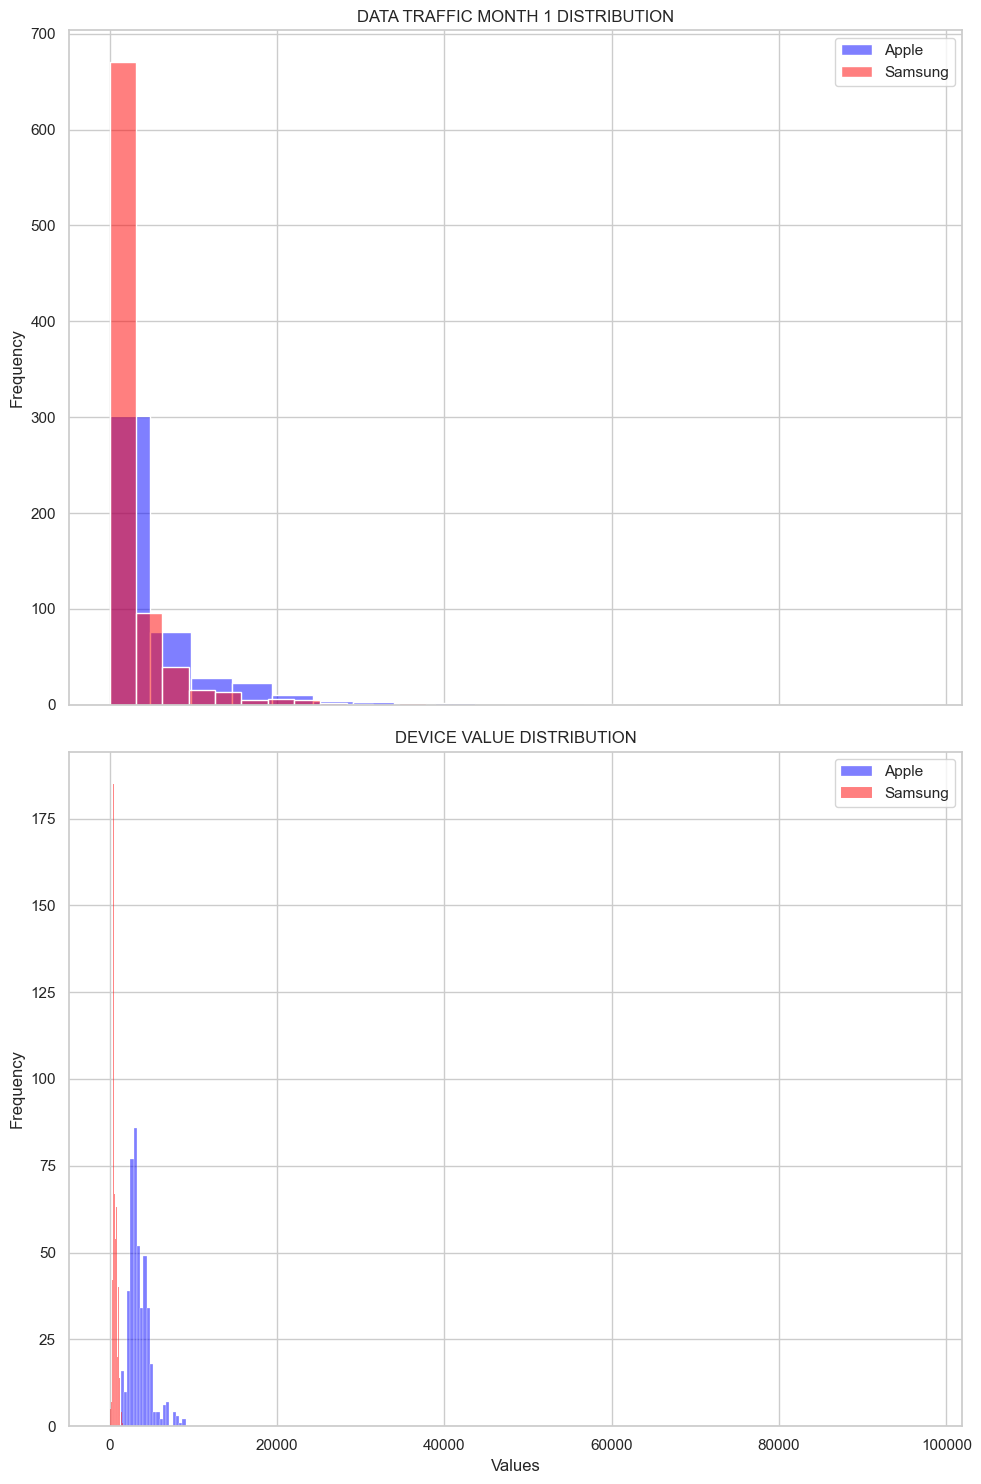

In [32]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(10, 15), sharex=True)

# Histogram for DATA_TRAFFIC
sns.histplot(apple_users_df['DATA_TRAFFIC_MONTH_1'], bins=20, fill=True, color='blue', kde=False, ax=axes[0], label='Apple', alpha=0.5)
sns.histplot(samsung_users_df['DATA_TRAFFIC_MONTH_1'], bins=20, fill=True, color='red', kde=False, ax=axes[0], label='Samsung', alpha=0.5)
axes[0].set_title('DATA TRAFFIC MONTH 1 DISTRIBUTION')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Histogram for DEVICE_VALUE
sns.histplot(apple_users_df['DEVICE_VALUE'], bins=20, fill=True, color='blue', kde=False, ax=axes[1], label='Apple', alpha=0.5)
sns.histplot(samsung_users_df['DEVICE_VALUE'], bins=20, fill=True, color='red', kde=False, ax=axes[1], label='Samsung', alpha=0.5)
axes[1].set_title('DEVICE VALUE DISTRIBUTION')
axes[1].set_ylabel('Frequency')
axes[1].legend()


axes[1].set_xlabel('Values')

plt.tight_layout()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on the differences you found between these two groups of users.</font>

Regarding data traffic in month 1 feature, we can see that for low values of data traffic there are much more Samsung users than Apple users, but as the data traffic value increases the number of users of both companies equals more and more.

As for the device value we can observe that the Apple users have paid much more, actually the Apple user that paid the less paid more than the Samsung user that paid the most. That could be expected as it is well known that Apple products are quite expensive.


<font size="+1" color="red">EXTRA POINTS</font>

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

encoder = LabelEncoder()

#encode categorical input variables
imputed_data['PREVIOUS_DEVICE_MODEL_ENC'] = encoder.fit_transform(imputed_data['PREVIOUS_DEVICE_MODEL'])
imputed_data['PREVIOUS_DEVICE_BRAND_ENC'] = encoder.fit_transform(imputed_data['PREVIOUS_DEVICE_BRAND'])

#encode target/output variable
imputed_data['PURCHASED_DEVICE_MANUFACTURER_ENC'] = encoder.fit_transform(imputed_data['PURCHASED_DEVICE_MANUFACTURER'])

X = imputed_data[['PREVIOUS_DEVICE_MODEL_ENC', 'PREVIOUS_DEVICE_BRAND_ENC', 'MONTHS_LAST_DEVICE']]
y = imputed_data['PURCHASED_DEVICE_MANUFACTURER_ENC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#accuracy
y_pred = clf.predict(X_test)
initial_accuracy = accuracy_score(y_test, y_pred)
print(f"Initial 3-variable model accuracy: {initial_accuracy:.4f}")

#two more features
imputed_data['DEVICE_VALUE_ENC'] = encoder.fit_transform(imputed_data['DEVICE_VALUE']) 
X_improved = imputed_data[['PREVIOUS_DEVICE_MODEL_ENC', 'PREVIOUS_DEVICE_BRAND_ENC', 'MONTHS_LAST_DEVICE', 
                           'DEVICE_VALUE_ENC', 'DATA_TRAFFIC_MONTH_1']]

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_improved, y, test_size=0.3, random_state=42)

clf_imp = DecisionTreeClassifier(random_state=42)
clf_imp.fit(X_train_imp, y_train_imp)

#accuracy
y_pred_imp = clf_imp.predict(X_test_imp)
improved_accuracy = accuracy_score(y_test_imp, y_pred_imp)
print(f"Improved 5-variable model accuracy: {improved_accuracy:.4f}")


Initial 3-variable model accuracy: 0.5120
Improved 5-variable model accuracy: 0.8058


We can effectively check that the accuracy of the model with 5 variables is much better and improved with respect to the model with 3 variables

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>